# 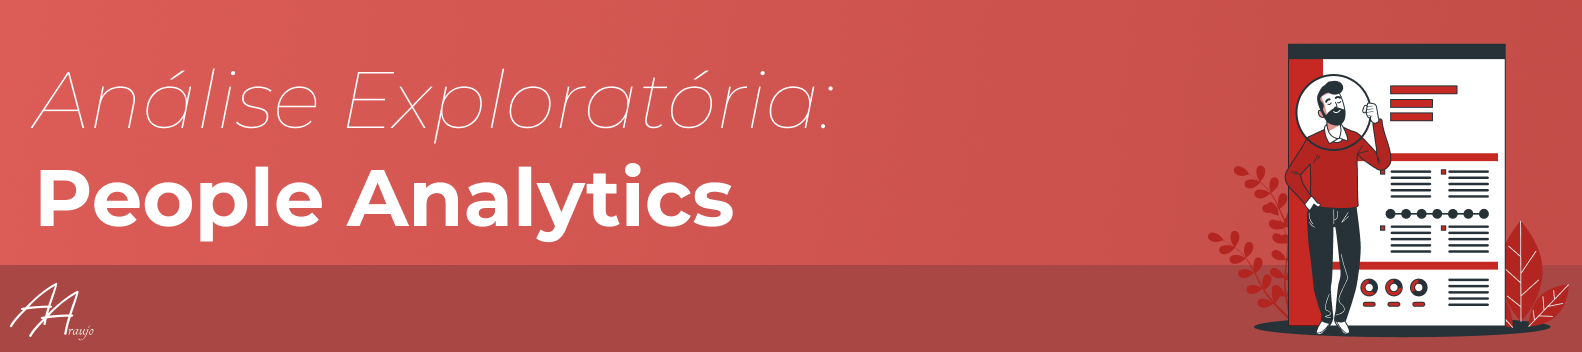  

# Exploração de dados People Analytics

Trata-se de uma base de dados de RH com dados de funcionários ativos e inativos, contemplando informações de <span style="color: var(--vscode-foreground);">Nome, Gênero, Data_Nascimento, Idade, Nível, Escolaridade, Área, Salário, Data_Admissão, Data_Demissão, Contrato, Motivo_Demissão, PCD, tipos de benefícios e status atual. O objetivo desta exploração de dados é responder algumas perguntas de negócios para posteriormente criar um painel de visualização com as métricas estratégicas para tomada de decisão do gestor da área, facilitando a compreensão e análise dos indicadores de forma visual, atrativa e eficiente. As seguintes perguntas de negócios são questionadas:</span>

1.   Total de funcionários na empresa ao longo do tempo, ativos e inativos;
2. Total de funcionários por genero;
3. Frequência de funcionários por idade;
4. Distribuição de funcionários por nível hierárquico;
5.  Distribuição de funcionários por Escolaridade;
6. Distribuição de funcionários por Área da empresa;
7. Salário médio por nível hierárquico;
8. Despesa total em salários?;
9. Quanto é gasto em valor de benefício "Combustível"?;
10. Qual a média salarial por escolaridade;
11. Qual mês obteve o maior percentual de admissões em relação ao anterior?;
12. Qual mês obteve o maior percentual de demissões em relação ao anterior?;
13. Total de funcionários por tipo de contrato;
14. Área vs tipo de contrato e percentual em relação ao total da área;
15. Área vs tipo de contrato e percentual em relação ao total da área;
16. Total de funcionários afastados ou de férias.

<span style="color: var(--vscode-foreground);">Embora o Azure Data Studio gere automaticamente gráficos nos outputs, a ideia desta exploração é apenas responder as questões mencionadas.</span>

<span style="color: var(--vscode-foreground);"><b>Obs:</b>&nbsp;Os dados foram gerados de forma sintética com o&nbsp;</span>    [https://www.mockaroo.com/](https:\www.mockaroo.com\)

In [4]:
-- Visualizando a base de dados
SELECT TOP(10) * FROM baseRH

(10 rows affected)

Total execution time: 00:00:00.010

Nome,Gênero,Data_Nascimento,Idade,Nível,Escolaridade,Área,Salário,Data_Admissão,Data_Demissão,Contrato,Motivo_Demissão,PCD,Alimentação,Saúde,Odont,Transporte,Creche,Combustível,Benefícios,Mês_admissão,Mês_demissão,Status,Faixa_Idade,Tempo_dias,Faixa_dias
Kylie Rame,Masculino,1996-03-17,28,Supervisor,Ensino Médio,Financeiro,7000,2019-01-01,NULL,CLT,NULL,NULL,1200,1200,1200,1200,NULL,500,5300,1,-,NULL,24-34,364,270-364
Dwayne Betun,Masculino,1988-02-28,36,Gerente,Pós-graduação,Recursos Humanos,15000,2019-01-02,NULL,CLT,NULL,NULL,1200,1200,1200,1200,NULL,500,5300,1,-,Férias,35-44,363,270-364
Chrisse Oxbrough,Masculino,1988-09-22,36,Gerente,Ensino Superior,Marketing,15000,2019-01-02,NULL,CLT,NULL,NULL,1200,1200,1200,1200,NULL,500,5300,1,-,NULL,35-44,363,270-364
Kimmy Fardy,Feminino,1988-03-14,36,Gerente,Pós-graduação,Produção,15000,2019-01-02,NULL,CLT,NULL,NULL,1200,1200,1200,1200,NULL,500,5300,1,-,NULL,35-44,363,270-364
Mata Steynor,Masculino,1994-06-28,30,Analista Sr,Ensino Técnico,Produção,5000,2019-01-02,NULL,CLT,NULL,NULL,600,600,600,600,NULL,500,2900,1,-,NULL,24-34,363,270-364
Rivi Ofen,Feminino,1981-10-19,43,Supervisor,Ensino Superior,Financeiro,7000,2019-01-03,NULL,CLT,NULL,NULL,1200,1200,1200,1200,NULL,500,5300,1,-,NULL,35-44,362,270-364
Ross Tutchell,Masculino,1991-05-14,33,Assistente,Ensino Médio,Produção,2500,2019-01-03,NULL,CLT,NULL,NULL,600,600,600,600,500,NULL,2900,1,-,NULL,24-34,362,270-364
Lisa De Antoni,Feminino,1961-04-28,63,Estagiário,Ensino Médio,Administração,1200,2019-01-03,NULL,Estágio,NULL,NULL,200,200,200,200,NULL,NULL,800,1,-,NULL,55-64,362,270-364
Bethena Josephs,Feminino,1978-08-08,46,Analista Jr,Ensino Técnico,TI,3500,2019-01-03,NULL,CLT,NULL,NULL,600,600,600,600,NULL,NULL,2400,1,-,NULL,45-54,362,270-364
Kellia Koppel,Feminino,1970-07-19,54,Assistente,Ensino Superior,Recursos Humanos,2500,2019-01-03,NULL,CLT,NULL,NULL,600,600,600,600,NULL,NULL,2400,1,-,NULL,45-54,362,270-364


In [5]:
-- Total de funcionários na empresa ao longo do tempo, ativos e inativos
DECLARE @funcionarios_ativos INT = (SELECT COUNT(*) FROM baseRH WHERE Data_Demissão IS NOT NULL)
DECLARE @funcionarios_inativos INT = (SELECT COUNT(*) FROM baseRH WHERE Data_Demissão IS NULL)

SELECT  
    COUNT(*) AS Total_histórico,
    @funcionarios_ativos AS Ativos,
    FORMAT(1.0 * @funcionarios_ativos/COUNT(*), '0.00%') AS Percentual_Ativos,
    @funcionarios_inativos AS Inativos,
    FORMAT(1.0 * @funcionarios_inativos/COUNT(*), '0.00%') AS Percentual_Inativos
FROM baseRH

(1 row affected)

Total execution time: 00:00:00.356

Total_histórico,Ativos,Percentual_Ativos,Inativos,Percentual_Inativos
1000,71,"7,10%",929,"92,90%"


In [6]:
-- Criando uma nova View somente com funcionários ativos
CREATE VIEW baseRH_ativos AS
(
    SELECT  
        *
    FROM baseRH
    WHERE Data_Demissão IS NULL
)

: Msg 2714, Level 16, State 3, Procedure baseRH_ativos, Line 2
Já existe um objeto com nome 'baseRH_ativos' no banco de dados.

Total execution time: 00:00:00.016

In [7]:
-- Total de funcionários por genero
DECLARE @Total_funcionarios INT = (SELECT COUNT(*) FROM baseRH_ativos)

SELECT
    Gênero,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/@Total_funcionarios, '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Gênero

(2 rows affected)

Total execution time: 00:00:00.018

Gênero,Total,Percentual
Masculino,468,"50,38%"
Feminino,461,"49,62%"


In [8]:
-- Frequência de funcionários por idade
DECLARE @Total_funcionarios INT = (SELECT COUNT(*) FROM baseRH_ativos)

SELECT
    Faixa_Idade,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/@Total_funcionarios, '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Faixa_Idade

(4 rows affected)

Total execution time: 00:00:00.015

Faixa_Idade,Total,Percentual
24-34,235,"25,30%"
35-44,237,"25,51%"
45-54,232,"24,97%"
55-64,225,"24,22%"


In [9]:
--Distribuição de funcionários por nível hierárquico
SELECT
    Nível,
    COUNT(*) AS Total
FROM baseRH_ativos
GROUP BY Nível
ORDER BY Total DESC

(7 rows affected)

Total execution time: 00:00:00.012

Nível,Total
Assistente,136
Supervisor,133
Analista Sr,133
Estagiário,133
Analista Jr,133
Coordenador,132
Gerente,129


In [10]:
-- Distribuição de funcionários por Escolaridade
SELECT
    Escolaridade,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(), '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Escolaridade
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.016

Escolaridade,Total,Percentual
Ensino Médio,256,"27,56%"
Ensino Técnico,239,"25,73%"
Ensino Superior,202,"21,74%"
Pós-graduação,161,"17,33%"
Mestrado,71,"7,64%"


In [11]:
--Distribuição de funcionários por Área da empresa
SELECT
    Área,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(), '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Área
ORDER BY Total DESC

(9 rows affected)

Total execution time: 00:00:00.017

Área,Total,Percentual
Administração,107,"11,52%"
Financeiro,107,"11,52%"
Produção,105,"11,30%"
Vendas,105,"11,30%"
Recursos Humanos,105,"11,30%"
Marketing,102,"10,98%"
TI,101,"10,87%"
Operações,101,"10,87%"
Logística,96,"10,33%"


In [12]:
--Salário médio por nível hierárquico
SELECT
    Nível,
    AVG(Salário) AS Total,
    FORMAT(1.0 *AVG(Salário)/SUM(AVG(Salário))OVER(), '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Nível
ORDER BY Total DESC

(7 rows affected)

Total execution time: 00:00:00.016

Nível,Total,Percentual
Gerente,15000,"33,94%"
Coordenador,10000,"22,62%"
Supervisor,7000,"15,84%"
Analista Sr,5000,"11,31%"
Analista Jr,3500,"7,92%"
Assistente,2500,"5,66%"
Estagiário,1200,"2,71%"


In [13]:
--Despesa total em salários?
SELECT 
    CONCAT('R$', FORMAT(SUM(Salário),'0.00')) AS Total
FROM baseRH_ativos

(1 row affected)

Total execution time: 00:00:00.012

Total
"R$5816100,00"


In [16]:
-- Quanto é gasto em valor de benefício "Combustível"?
SELECT
    sum(Combustível) AS 'Combustível'
FROM baseRH_ativos

Aviso: o valor nulo é eliminado por uma agregação ou outra operação SET.

(1 row affected)

Total execution time: 00:00:00.011

Combustível
263500


In [17]:
--Qual a média salarial por escolaridade
SELECT
    Escolaridade,
    AVG(Salário) AS Total,
    FORMAT(1.0 *AVG(Salário)/SUM(AVG(Salário))OVER(), '0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Escolaridade
ORDER BY Total DESC

(5 rows affected)

Total execution time: 00:00:00.018

Escolaridade,Total,Percentual
Mestrado,10971,"31,16%"
Pós-graduação,7838,"22,26%"
Ensino Superior,6235,"17,71%"
Ensino Técnico,5125,"14,56%"
Ensino Médio,5041,"14,32%"


In [20]:
-- Variação percentual de funcionários admitidos por mês
-- Qual mês obteve o maior percentual de admissões em relação ao anterior?
SELECT
    Mês_admissão,
    COUNT(*) AS 'Total',
    FORMAT(1.0 * (COUNT(*) - LAG(COUNT(*),1)OVER(ORDER BY Mês_admissão))/COUNT(*),'0.00%') AS 'MoM'
FROM baseRH_ativos
GROUP BY Mês_admissão
ORDER BY Mês_admissão ASC

(12 rows affected)

Total execution time: 00:00:00.011

Mês_admissão,Total,MoM
1,91,NULL
2,64,"-42,19%"
3,84,"23,81%"
4,74,"-13,51%"
5,81,"8,64%"
6,84,"3,57%"
7,85,"1,18%"
8,79,"-7,59%"
9,63,"-25,40%"
10,79,"20,25%"


In [19]:
-- Variação percentual de funcionários demitidos por mês
-- Qual mês obteve o maior percentual de demissões em relação ao anterior?
SELECT
    Mês_demissão,
    COUNT(*) AS 'Total',
    FORMAT(1.0 * (COUNT(*) - LAG(COUNT(*),1)OVER(ORDER BY CAST(Mês_demissão AS INT)))/COUNT(*),'0.00%') AS 'MoM'
FROM baseRH
WHERE Mês_demissão <> '-'
GROUP BY Mês_demissão
ORDER BY CAST(Mês_demissão AS INT) ASC

(11 rows affected)

Total execution time: 00:00:00.015

Mês_demissão,Total,MoM
2,2,NULL
3,5,"60,00%"
4,5,"0,00%"
5,3,"-66,67%"
6,7,"57,14%"
7,5,"-40,00%"
8,6,"16,67%"
9,10,"40,00%"
10,6,"-66,67%"
11,7,"14,29%"


In [21]:
-- Total de funcionários por tipo de contrato
DECLARE @totalFunc INT = (SELECT COUNT(*) FROM baseRH_ativos)

SELECT 
 Contrato,
 COUNT(*) AS Total,
 FORMAT(1.0 * COUNT(*)/@totalFunc,'0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Contrato

(2 rows affected)

Total execution time: 00:00:00.018

Contrato,Total,Percentual
CLT,796,"85,68%"
Estágio,133,"14,32%"


In [22]:
-- Área vs tipo de contrato e percentual em relação ao total da área
SELECT 
 Área,
 Contrato,
 COUNT(*) AS Total,
 FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY Área),'0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Área, Contrato
ORDER BY Área ASC

(18 rows affected)

Total execution time: 00:00:00.017

Área,Contrato,Total,Percentual
Administração,CLT,92,"85,98%"
Administração,Estágio,15,"14,02%"
Financeiro,CLT,91,"85,05%"
Financeiro,Estágio,16,"14,95%"
Logística,CLT,82,"85,42%"
Logística,Estágio,14,"14,58%"
Marketing,CLT,88,"86,27%"
Marketing,Estágio,14,"13,73%"
Operações,CLT,88,"87,13%"
Operações,Estágio,13,"12,87%"


In [23]:
-- Área vs tipo de contrato e percentual em relação ao total da área
SELECT 
 Área,
 COALESCE(PCD,'Não') AS 'PCD?',
 COUNT(*) AS Total,
 FORMAT(1.0 * COUNT(*)/SUM(COUNT(*))OVER(PARTITION BY Área),'0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY Área, PCD
ORDER BY Área ASC

(18 rows affected)

Total execution time: 00:00:00.018

Área,PCD?,Total,Percentual
Administração,Não,95,"88,79%"
Administração,Sim,12,"11,21%"
Financeiro,Não,97,"90,65%"
Financeiro,Sim,10,"9,35%"
Logística,Não,82,"85,42%"
Logística,Sim,14,"14,58%"
Marketing,Não,89,"87,25%"
Marketing,Sim,13,"12,75%"
Operações,Não,87,"86,14%"
Operações,Sim,14,"13,86%"


In [24]:
-- Total de funcionários afastados ou de férias
DECLARE @totalFunc INT = (SELECT COUNT(*) FROM baseRH_ativos)

SELECT
    COALESCE([Status],'Ativos') AS Status,
    COUNT(*) AS Total,
    FORMAT(1.0 * COUNT(*)/@totalFunc,'0.00%') AS Percentual
FROM baseRH_ativos
GROUP BY [Status]

(3 rows affected)

Total execution time: 00:00:00.017

Status,Total,Percentual
Ativos,900,"96,88%"
Licença,5,"0,54%"
Férias,24,"2,58%"
